In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations 

import sklearn
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

**We know that for KMeans clustering we need to decide the number of clusters/centroids so we take hint from the optimal no. of clusters that we got before from mean shift algorithm and try them out.**
* using different subsets of the original data
* using variations of the original segmentation attributes
* using different distance metrics
* using different segmentation methods
* using different numbers of clusters

In [20]:
df1           = pd.read_pickle("./ds1_trans.pkl")
df2           = pd.read_pickle("./ds2_trans.pkl")
df1_churn     = pd.read_pickle("./df1_churn.pkl")
df2_churn     = pd.read_pickle("./df2_churn.pkl")
df1_not_churn = pd.read_pickle("./df1_not_churn.pkl")
df2_not_churn = pd.read_pickle("./df2_not_churn.pkl")

df1           = df1.drop('churn', axis=1)
df2           = df2.drop('Churn', axis=1)
df1_churn     = df1_churn.drop('churn', axis=1)
df2_churn     = df2_churn.drop('Churn', axis=1)
df1_not_churn = df1_not_churn.drop('churn', axis=1)
df2_not_churn = df2_not_churn.drop('Churn', axis=1)

**Need to look at the data to estimate the no. of cluster centers required but difficult to plot in multi-dimentional dataset**

In [5]:
def run_Kmeans(df, try_no_clusters):
    dfx         = scale(df)
    col_names   = df.columns
    all_comb    = list(combinations(col_names, 2))
    color_theme = np.array(['red','green','blue','yellow','black','pink','orange','violet','brown','white'])
    clustering = KMeans(n_clusters=try_no_clusters)
    clustering.fit(dfx)
    print(clustering)
    #permutate over all colummns !!!
    for i in range(len(all_comb)):
        plt.scatter(x=df[all_comb[i][0]], y=df[all_comb[i][1]], c=color_theme[clustering.labels_],s=10)
        plt.show()
    return clustering

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


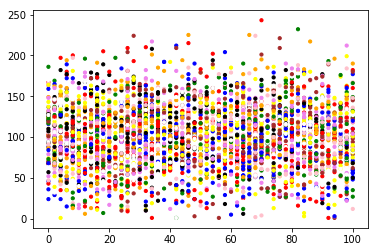

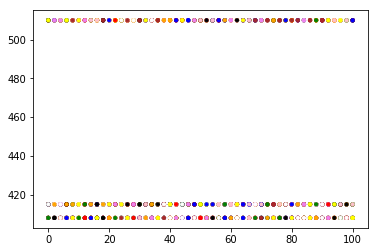

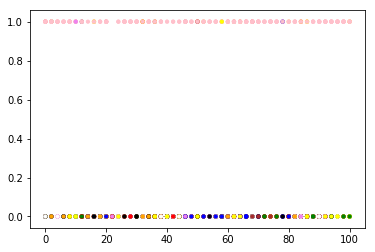

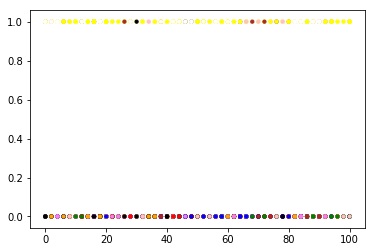

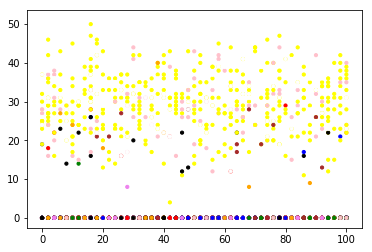

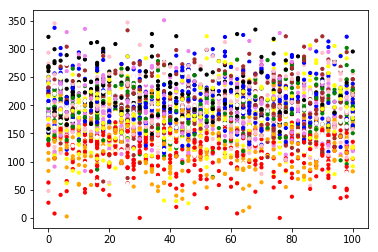

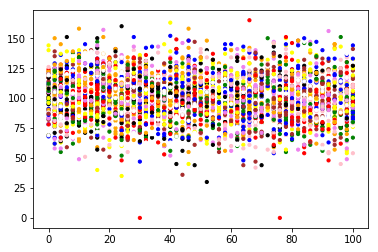

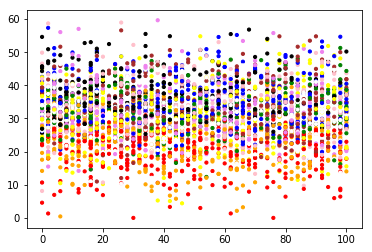

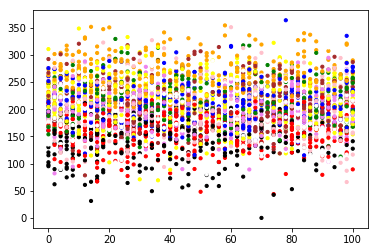

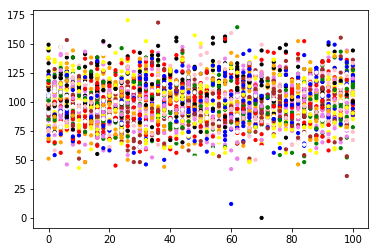

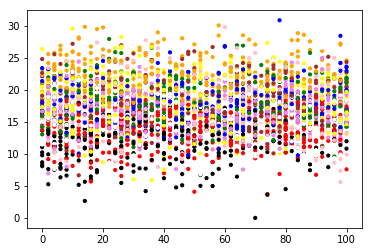

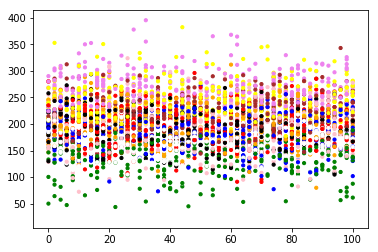

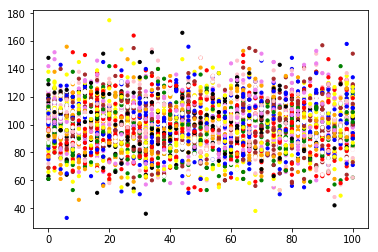

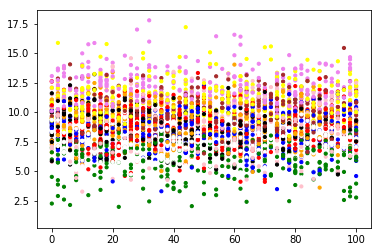

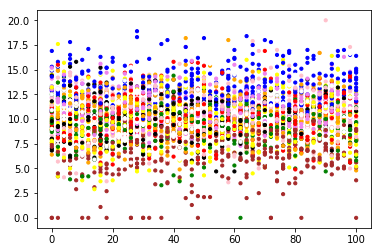

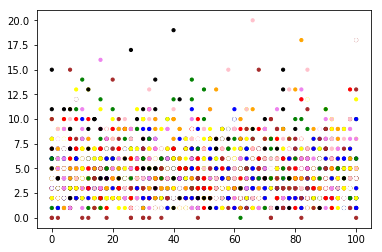

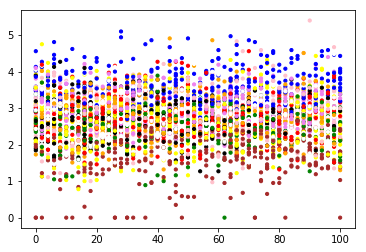

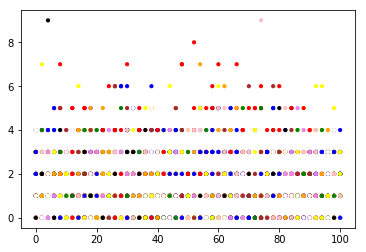

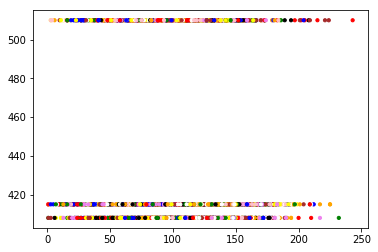

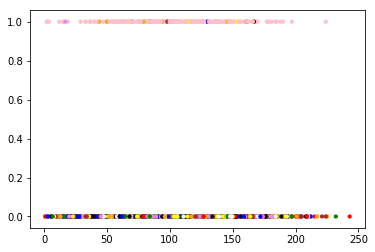

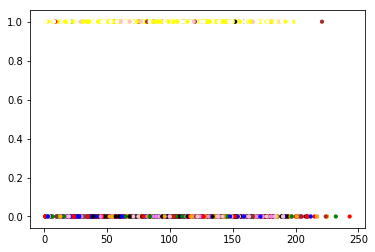

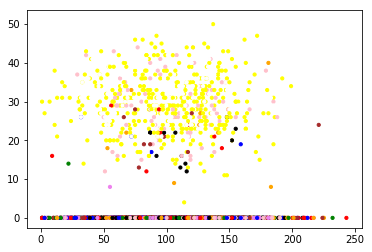

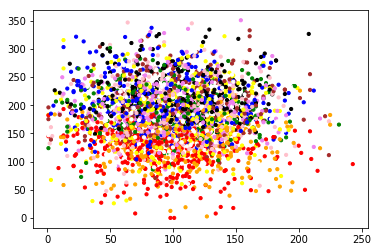

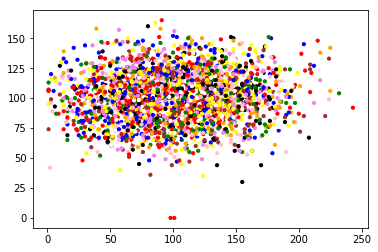

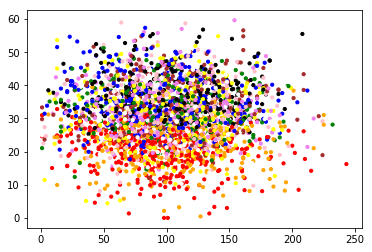

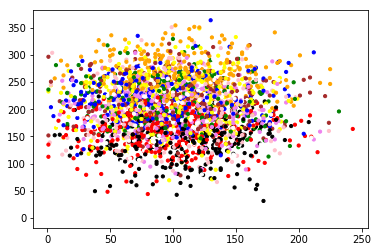

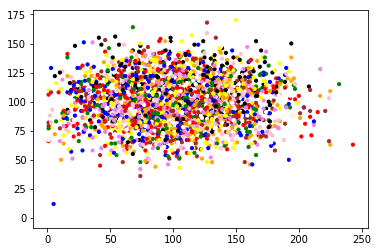

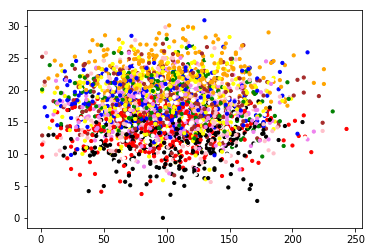

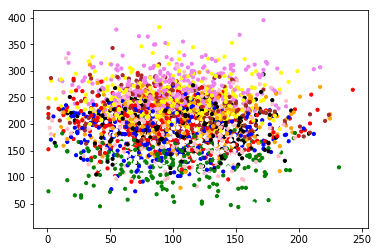

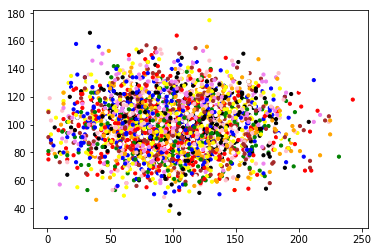

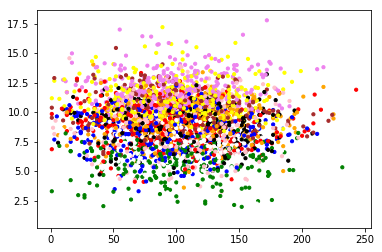

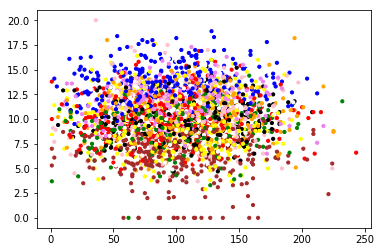

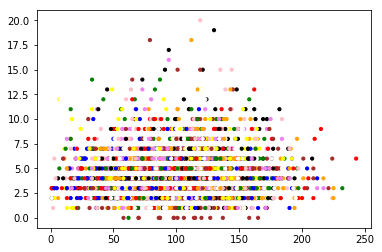

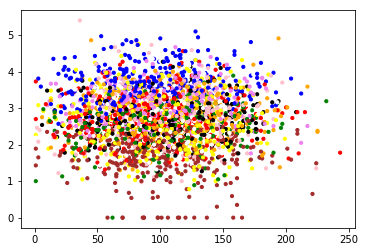

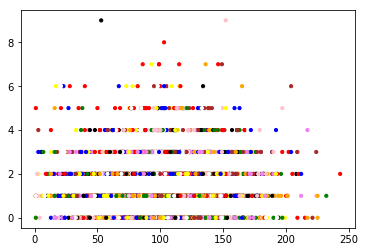

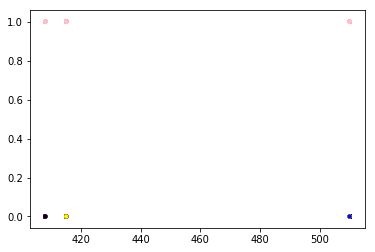

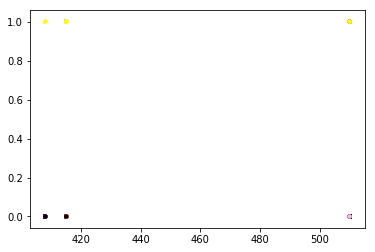

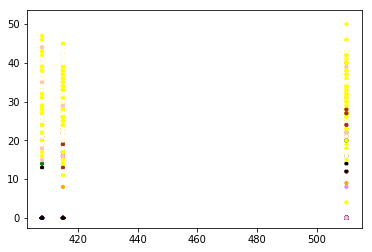

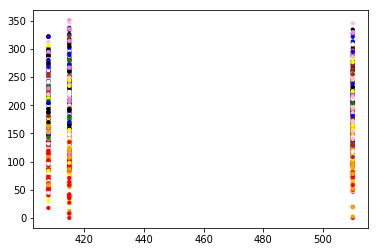

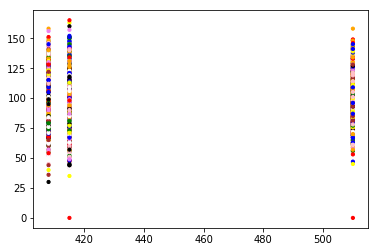

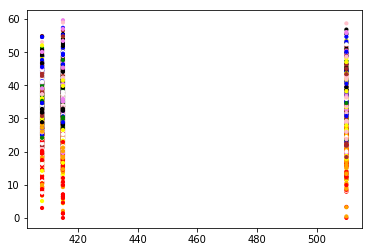

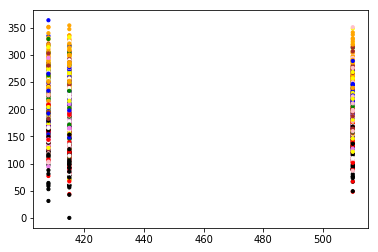

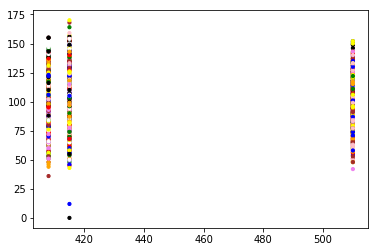

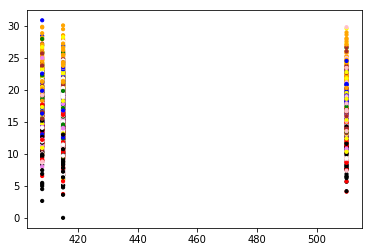

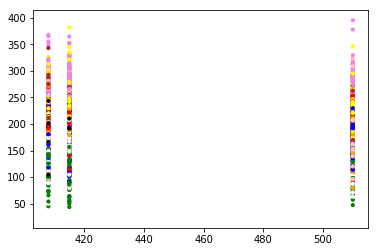

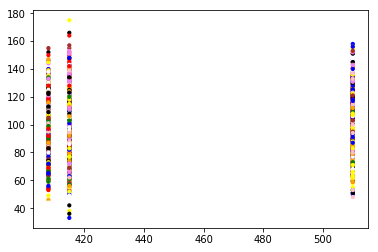

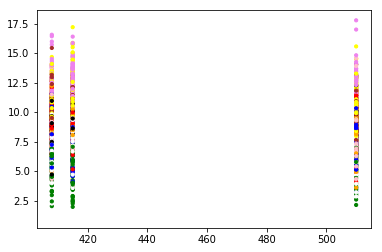

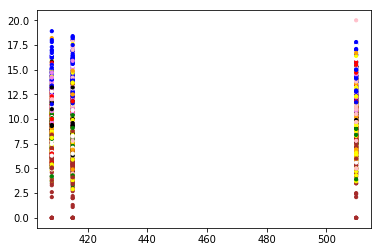

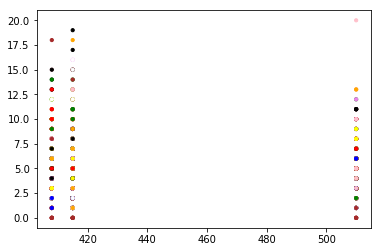

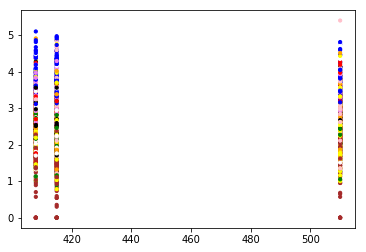

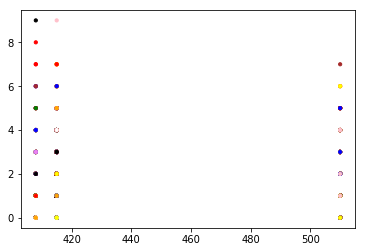

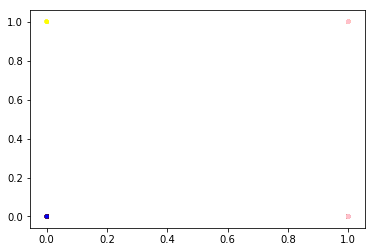

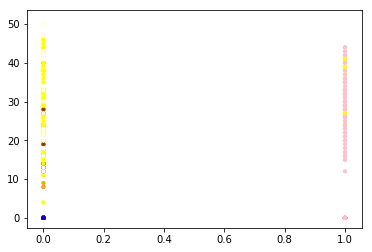

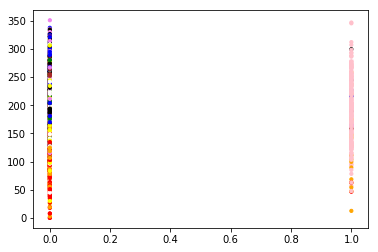

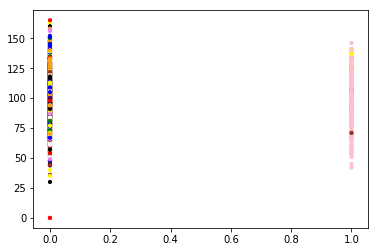

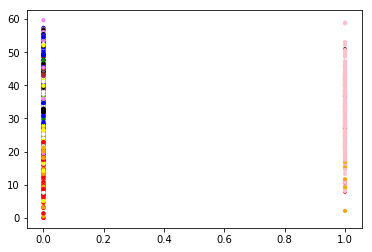

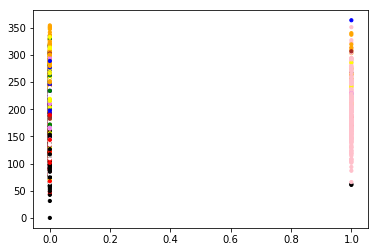

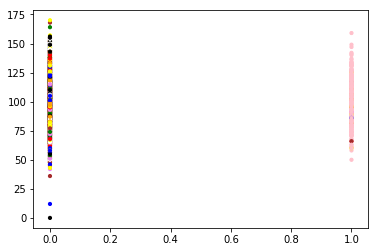

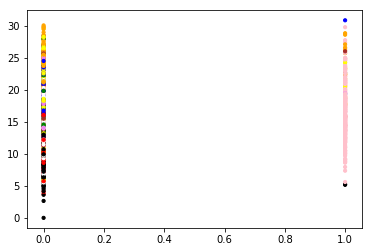

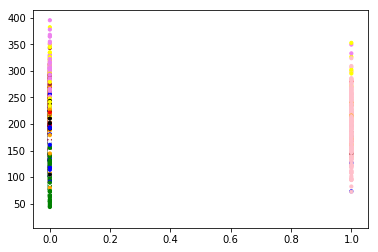

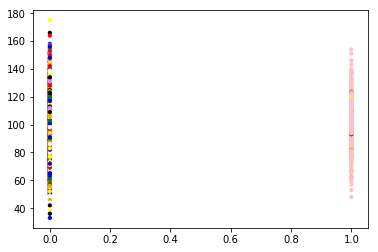

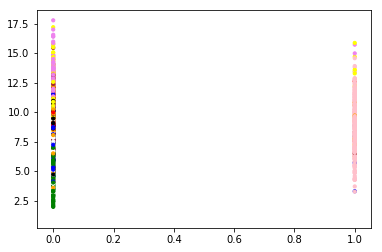

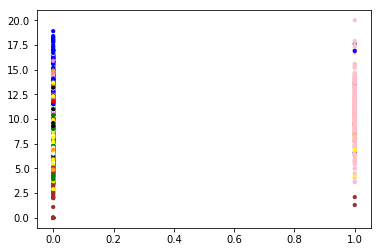

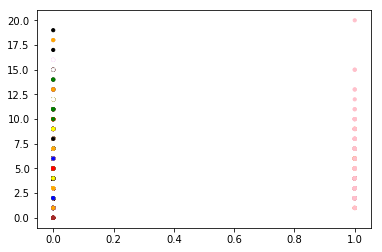

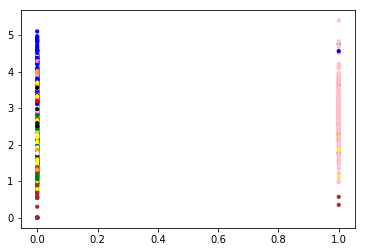

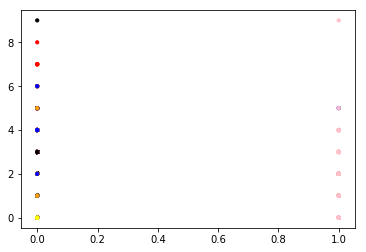

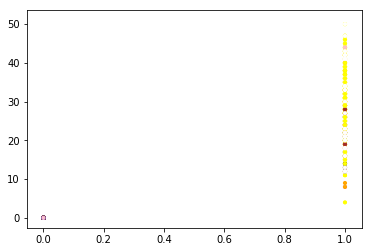

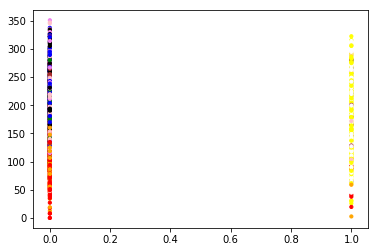

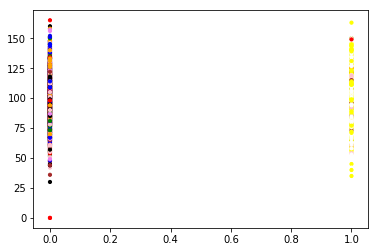

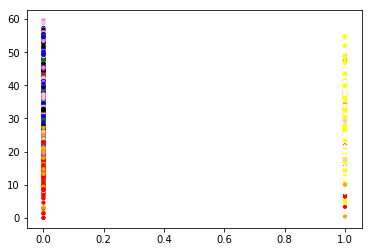

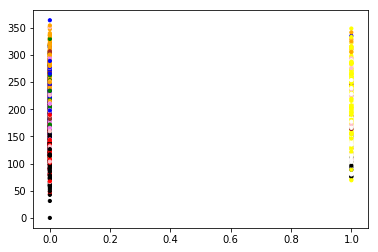

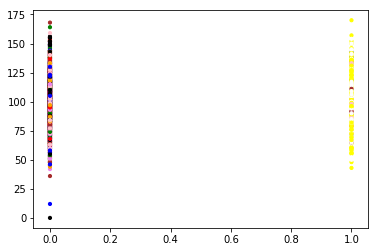

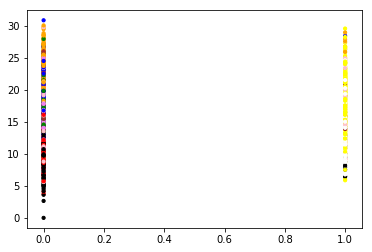

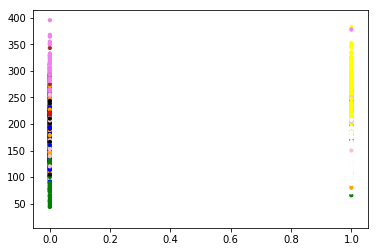

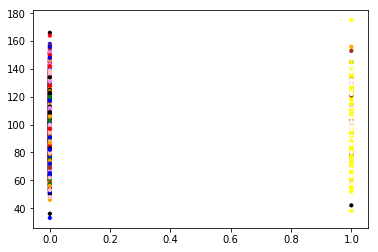

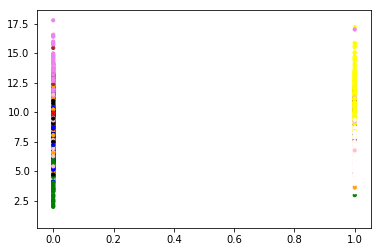

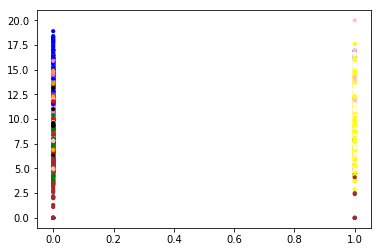

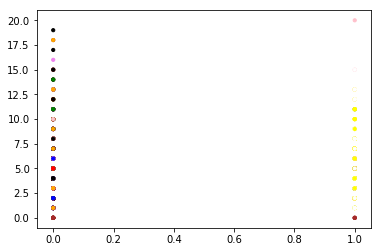

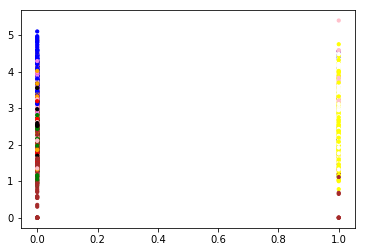

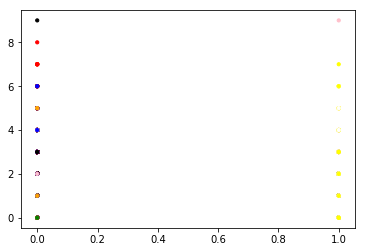

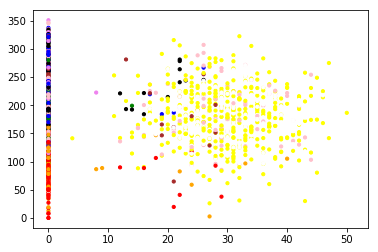

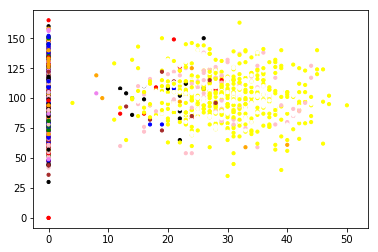

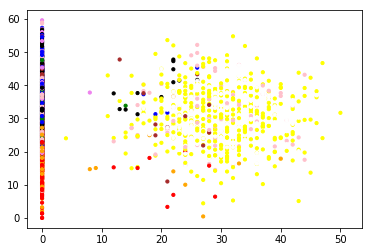

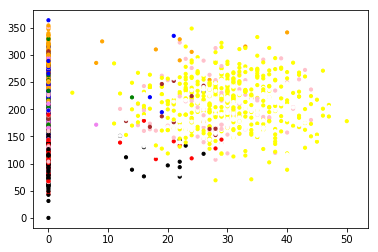

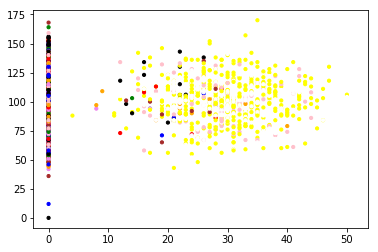

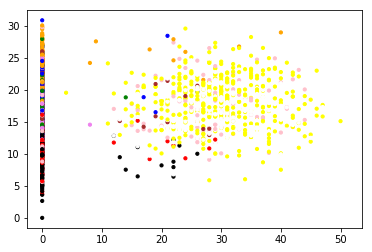

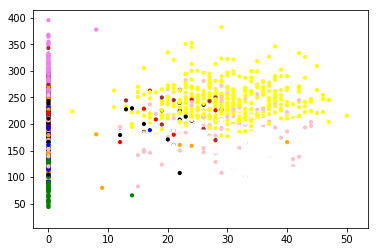

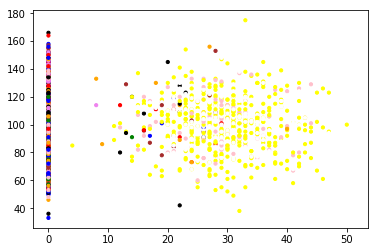

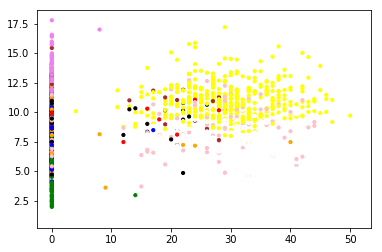

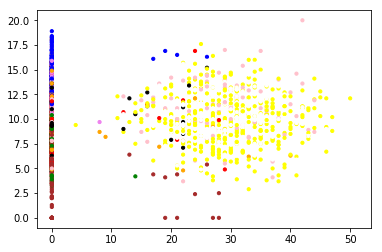

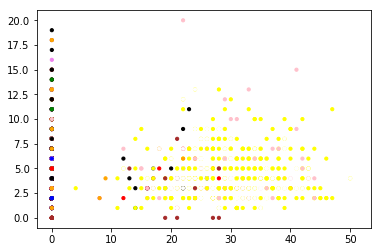

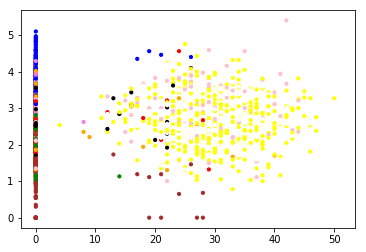

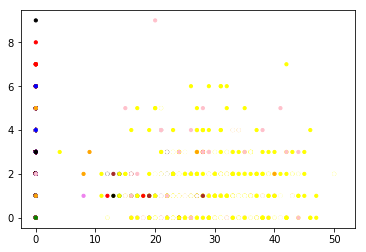

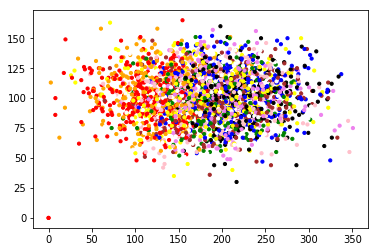

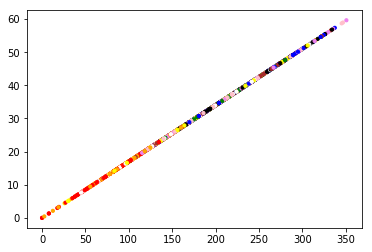

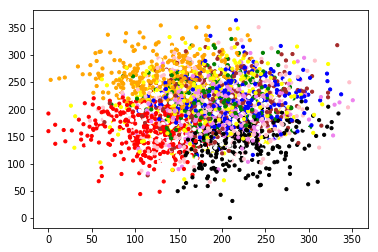

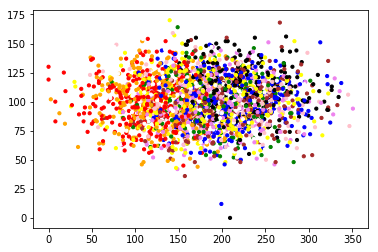

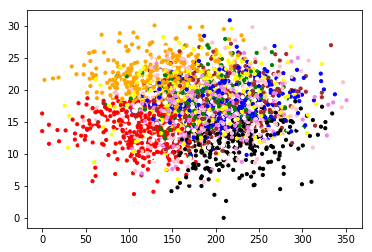

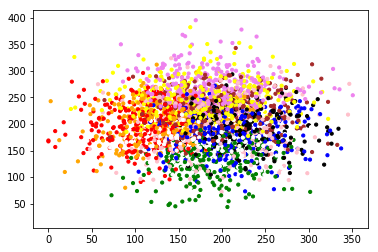

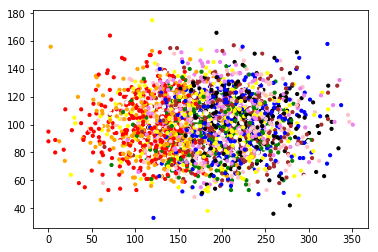

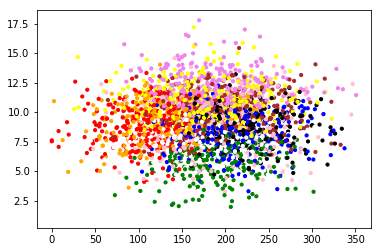

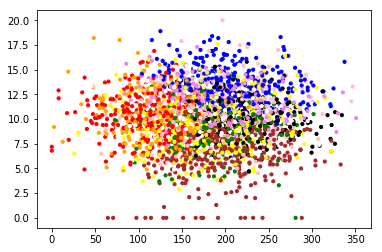

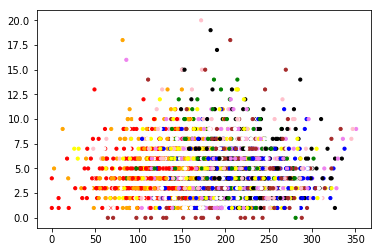

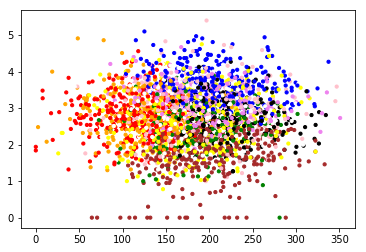

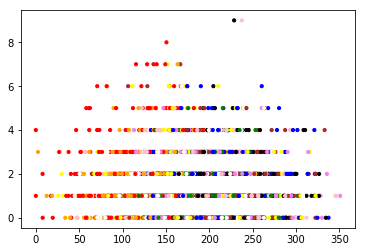

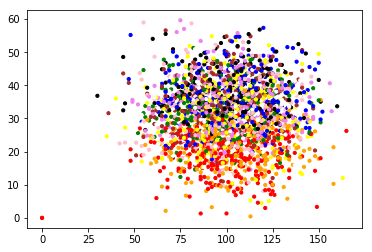

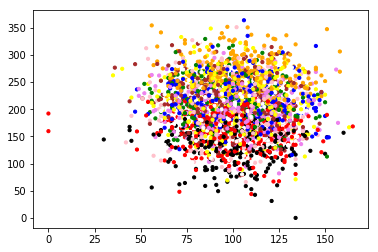

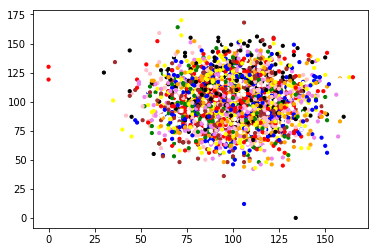

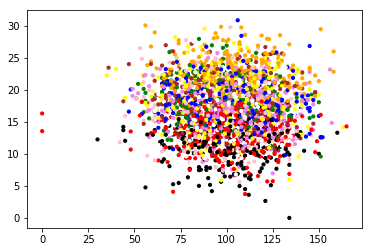

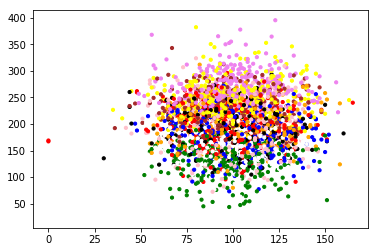

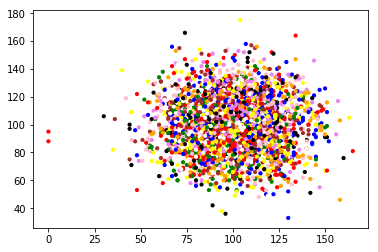

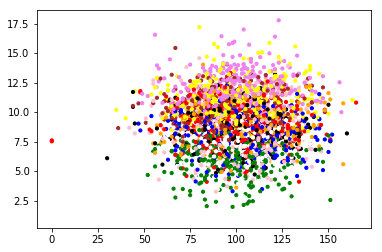

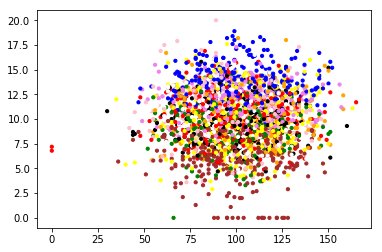

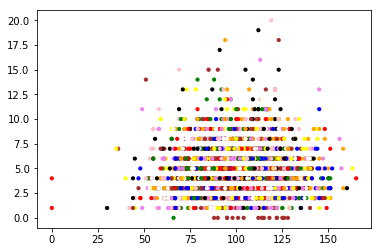

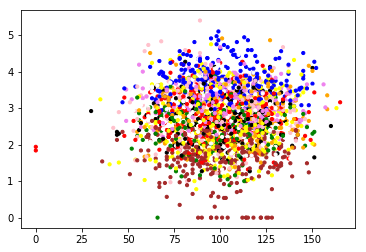

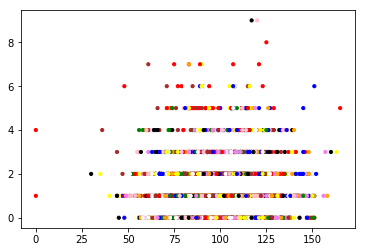

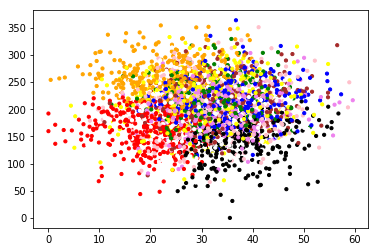

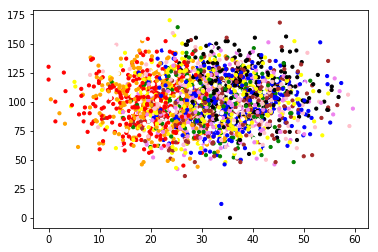

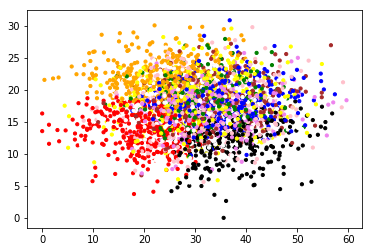

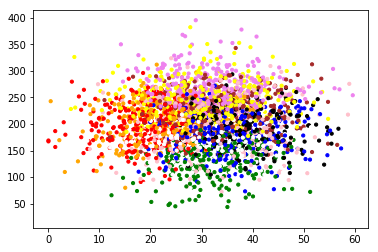

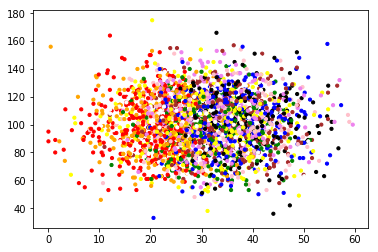

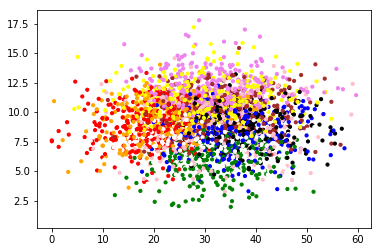

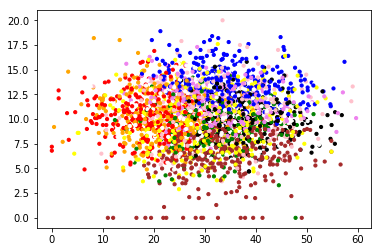

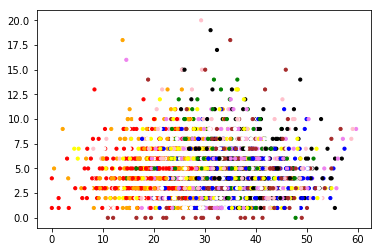

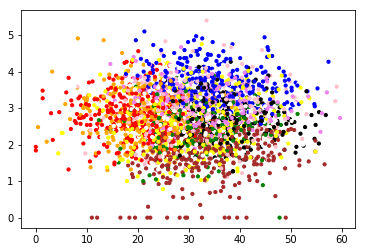

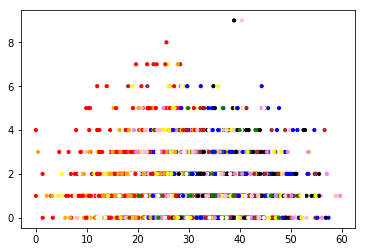

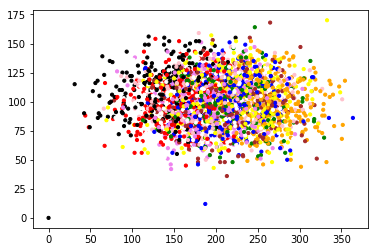

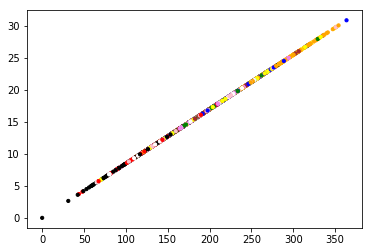

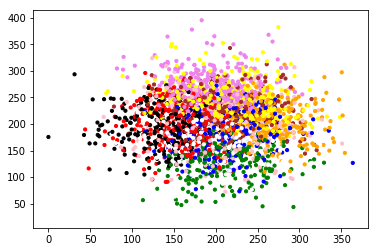

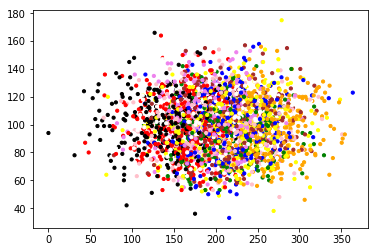

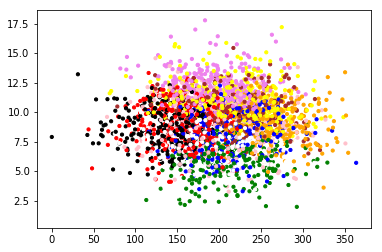

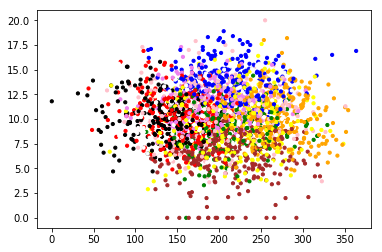

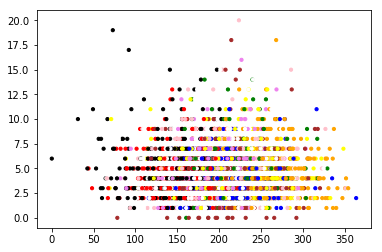

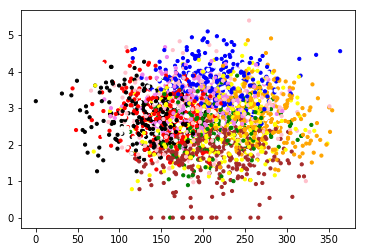

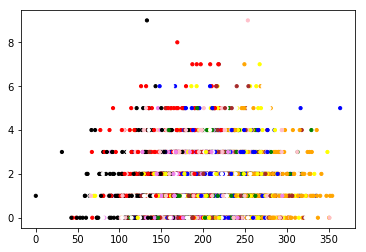

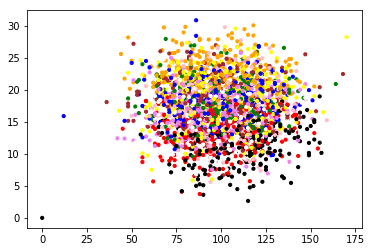

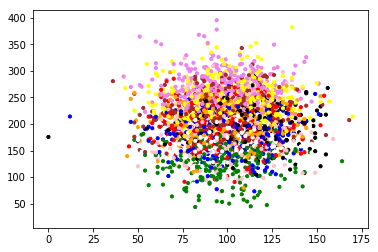

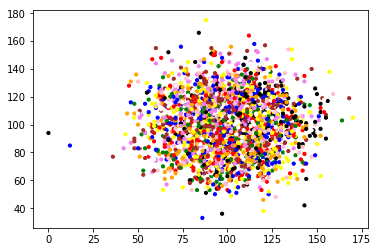

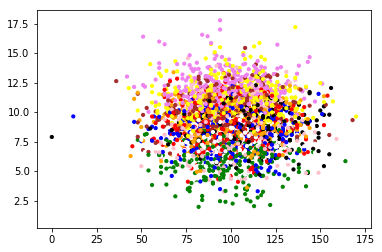

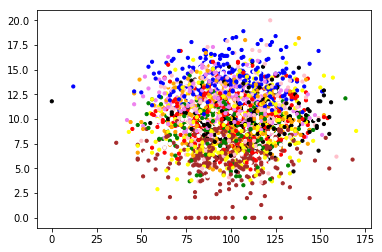

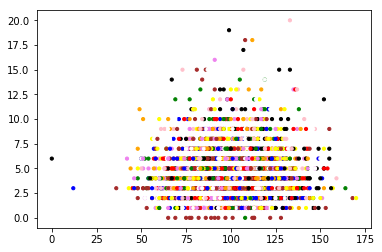

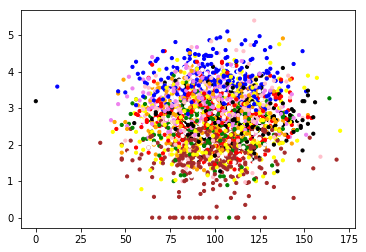

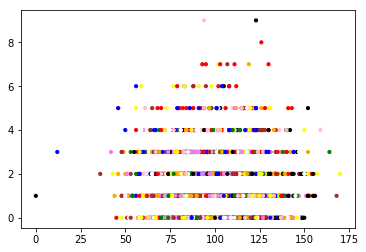

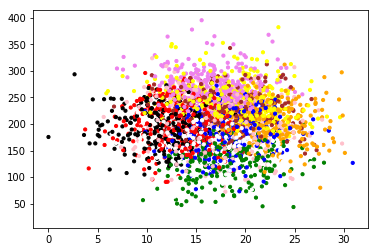

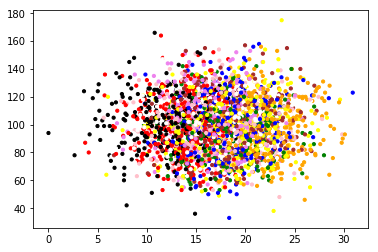

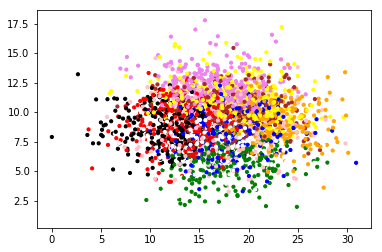

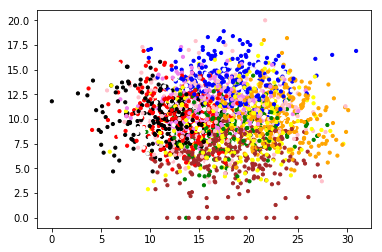

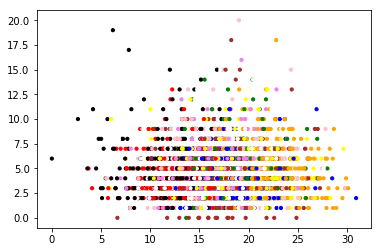

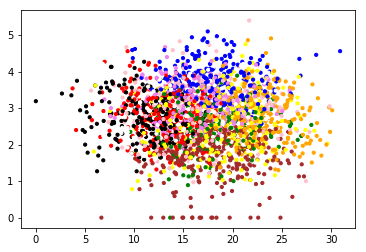

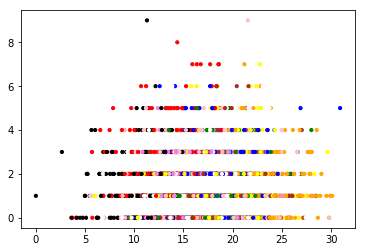

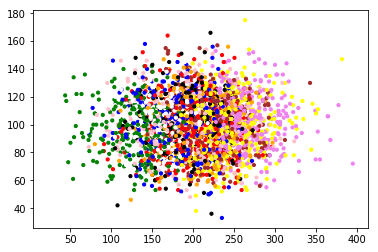

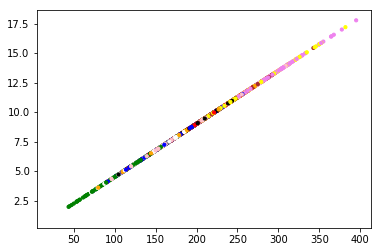

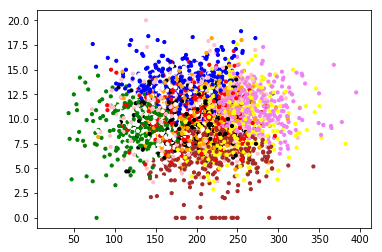

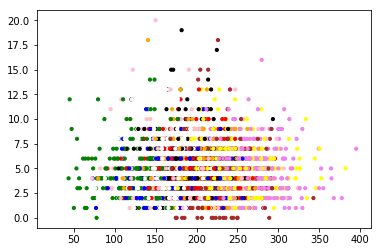

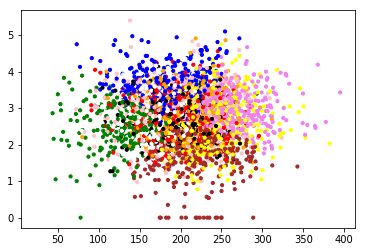

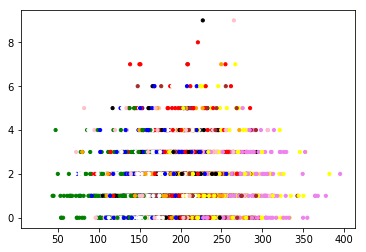

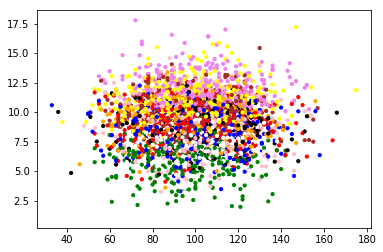

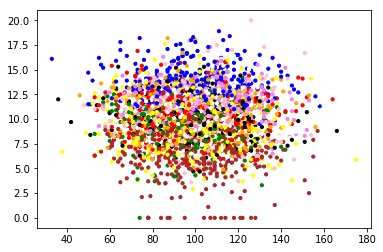

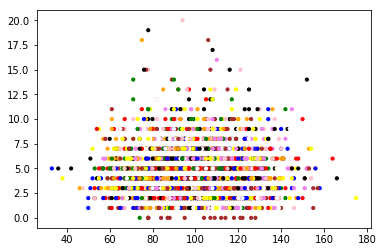

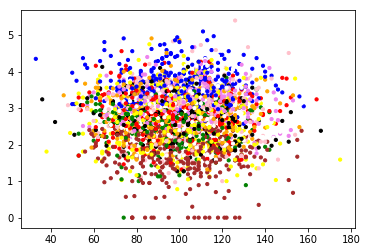

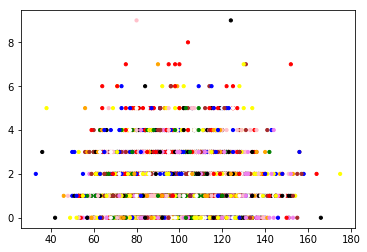

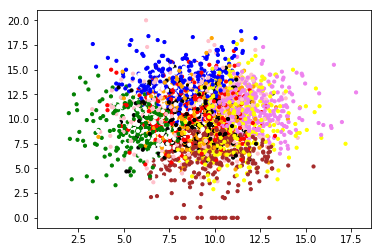

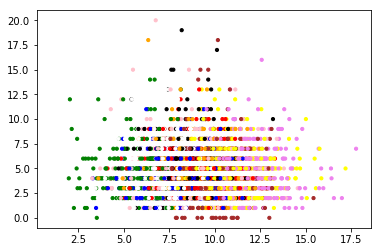

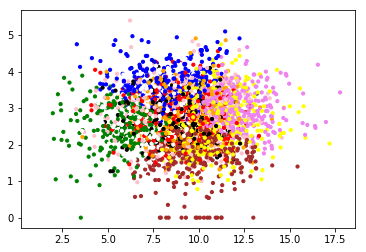

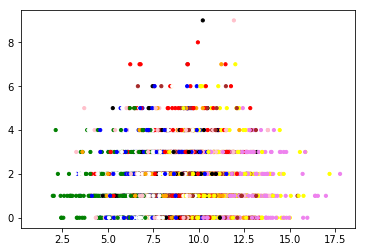

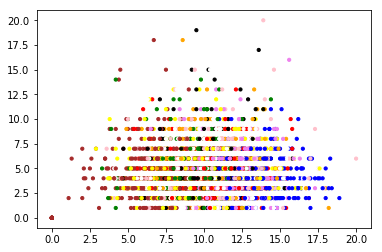

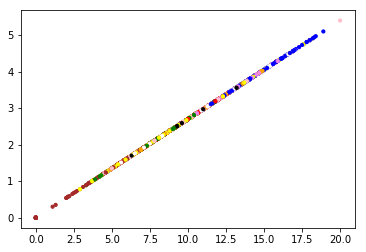

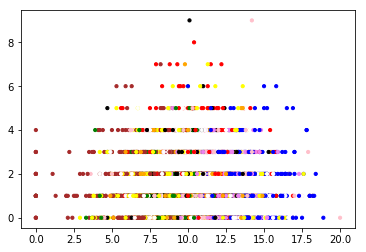

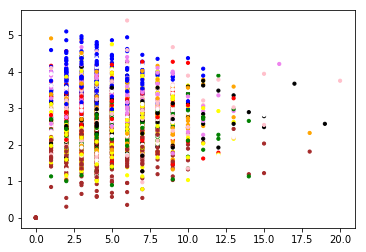

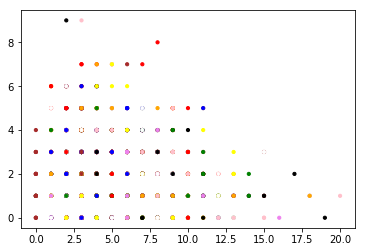

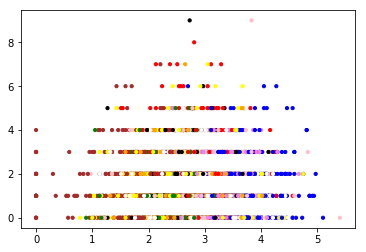

[3 3 4 ..., 2 5 3]


In [6]:
df1_5_clusters = run_Kmeans(df1,10)
print(df1_5_clusters.labels_)

### Now splitting the original un-scalled dataset accourding to the cluster for further analysis

In [14]:

count_labels    = Counter(list(df1_5_clusters.labels_))
label_no        = list(count_labels.keys())
label_freq      = list(count_labels.values())
label_no.sort()
print(label_no)
print(label_freq)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[386, 295, 294, 324, 355, 334, 408, 269, 325, 343]


In [21]:
def split_datasets_into_cluster(df, cluster_labels):
    df['cluster']   = cluster_labels
    count_labels    = Counter(list(cluster_labels))
    label_no        = list(count_labels.keys())
    label_freq      = list(count_labels.values())
    print(label_no)
    print(label_freq)
    label_no.sort()
                                                
    df_cluster_list = [df[0:0] for i in range(len(label_no))]   #cluster_labels
    for i in range(len(label_no)):
        df_cluster_list[i] = df[df['cluster'] == i]
        
    return df_cluster_list

In [22]:
clustering_result = split_datasets_into_cluster(df1, df1_5_clusters.labels_)

[3, 4, 5, 6, 0, 8, 9, 1, 2, 7]
[386, 295, 294, 324, 355, 334, 408, 269, 325, 343]


In [25]:
clustering_result[4]

state  account length  area code  international plan  \
phone number                                                         
358-1921          4             137        415                   0   
375-9999          2              84        408                   1   
344-9403         20              74        415                   0   
358-1958         40             130        415                   0   
383-1121         14             172        408                   0   
355-7251          6             125        408                   0   
359-5893         28             174        408                   0   
415-2935         82             147        510                   0   
362-5889         48              85        415                   0   
355-8887         74              46        415                   0   
334-1275         14             155        415                   0   
366-4467         56             104        408                   0   
354-3783         30             135        415                   0   
403-4298         70             157        408                   0   
369-5526         58             121        510                   0   
411-5859         60             163        408                   0   
336-7600          2              65        408                   0   
335-4584          6             146        415                   0   
415-2393         14             179        408                   0   
377-1765         44              94        415                   0   
422-1471         26             106        408                   0   
373-4819         46             164        510                   0   
359-5461         34             130        415                   0   
378-3625         34             208        510                   0   
344-3388         18             122        415                   0   
411-2284         14              99        415                   0   
356-1567          8             106        415                   0   
400-5751          4             138        510                   0   
355-9508         66             137        510                   0   
350-6759         18             166        510                   0   
...             ...             ...        ...                 ...   
418-3181         70              97        415                   0   
358-7165          6              44        408                   0   
386-8943         62             103        415                   0   
376-9716         16             177        408                   0   
344-3145         32             105        415                   0   
338-7305         12             110        415                   0   
350-2075         14             153        510                   0   
365-3493         58             176        408                   0   
394-9984         50             131        510                   0   
417-4456         34              75        415                   0   
397-9251         34              51        415                   0   
388-8797         54              98        408                   0   
339-5423         82              62        415                   0   
366-9015         40              94        415                   0   
336-9273         52             152        510                   0   
332-1690         70             110        408                   0   
415-6333         40             108        415                   0   
402-3908         98              87        415                   0   
397-4968         62             142        510                   0   
327-1058          6             112        415                   0   
354-3040          2              88        408                   0   
378-2397          6             134        415                   0   
362-2067          0              57        415                   0   
364-8731         94              39        408                   0   
362-8886         18     

#### Now we need to save these for further analysis and profiling

In [56]:
                                        # df____.to_pickle("./Clustering_results_for_further_analysis_and_profiling/df____.pkl")
t = time.time()
for i in range(len(clustering_result)):
    b = './Clustering_results_for_further_analysis_and_profiling/'
    s = 'KMeans__'+str(x)+'__C_'+str(i)
    clustering_result[i].to_pickle(b+s+'.pkl')

In [57]:
df_verify = pd.read_pickle('./Clustering_results_for_further_analysis_and_profiling/'+'KMeans__1554559866.33101__C_4.pkl')
df_verify

state  account length  area code  international plan  \
phone number                                                         
358-1921          4             137        415                   0   
375-9999          2              84        408                   1   
344-9403         20              74        415                   0   
358-1958         40             130        415                   0   
383-1121         14             172        408                   0   
355-7251          6             125        408                   0   
359-5893         28             174        408                   0   
415-2935         82             147        510                   0   
362-5889         48              85        415                   0   
355-8887         74              46        415                   0   
334-1275         14             155        415                   0   
366-4467         56             104        408                   0   
354-3783         30             135        415                   0   
403-4298         70             157        408                   0   
369-5526         58             121        510                   0   
411-5859         60             163        408                   0   
336-7600          2              65        408                   0   
335-4584          6             146        415                   0   
415-2393         14             179        408                   0   
377-1765         44              94        415                   0   
422-1471         26             106        408                   0   
373-4819         46             164        510                   0   
359-5461         34             130        415                   0   
378-3625         34             208        510                   0   
344-3388         18             122        415                   0   
411-2284         14              99        415                   0   
356-1567          8             106        415                   0   
400-5751          4             138        510                   0   
355-9508         66             137        510                   0   
350-6759         18             166        510                   0   
...             ...             ...        ...                 ...   
418-3181         70              97        415                   0   
358-7165          6              44        408                   0   
386-8943         62             103        415                   0   
376-9716         16             177        408                   0   
344-3145         32             105        415                   0   
338-7305         12             110        415                   0   
350-2075         14             153        510                   0   
365-3493         58             176        408                   0   
394-9984         50             131        510                   0   
417-4456         34              75        415                   0   
397-9251         34              51        415                   0   
388-8797         54              98        408                   0   
339-5423         82              62        415                   0   
366-9015         40              94        415                   0   
336-9273         52             152        510                   0   
332-1690         70             110        408                   0   
415-6333         40             108        415                   0   
402-3908         98              87        415                   0   
397-4968         62             142        510                   0   
327-1058          6             112        415                   0   
354-3040          2              88        408                   0   
378-2397          6             134        415                   0   
362-2067          0              57        415                   0   
364-8731         94              39        408                   0   
362-8886         18     